In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/hengbinxu/Gradient-Descent-Implementation/master/data.csv',
                 header=None)
df.columns = ['y','x']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
y    100 non-null float64
x    100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
df.head()

,y,x
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


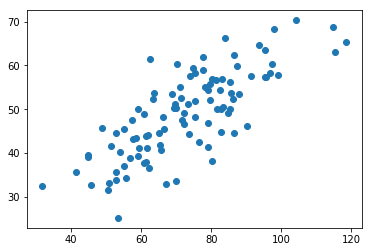

In [6]:
plt.plot(df.x,df.y,'o')

In [7]:
# implemetation 
class gradient_descent():
    def __init__(self, num_iteration, learning_rate):
        self.numIteration = num_iteration # setting number of iteration
        self.learningRate = learning_rate # setting learning rate
        
    def compute_error(self, y, x, theta):
        error = np.sum((y - np.dot(theta, x.transpose()))**2)/(2*len(y)) # Cost function-MSE
        return(error)
    
    def add_bias_feature(self, x):
        adding = np.ones(x.shape[0])
        new_x = np.column_stack(tup = (adding, x)) 
        return(new_x)
        
    def calculate_gradient(self, y, x, rand_seed): # hypothesis => y = b + wx
        
        x = self.add_bias_feature(x)
        xTrans = x.transpose()
        
        np.random.seed(seed = rand_seed)
        theta = np.random.normal(loc = 0, scale = 1, size = x.shape[1]) # initialize theta
        theta_history = np.zeros(shape = (self.numIteration, x.shape[1]))
        error_history = np.zeros(shape = self.numIteration)
        
        for num in range(self.numIteration):
            
            gradient = np.dot(xTrans, (y - np.dot(theta, xTrans)))/(-len(y)) 
            
            theta = (theta - self.learningRate * gradient.flatten()) # update parameter
            
            theta_history[num] = theta
            error_history[num] = self.compute_error(y, x, theta)
            # Calculate error after updating the parameters.
            
        return(theta_history, error_history)

In [8]:
df.head()

,y,x
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [9]:
y = df.y
x = df.x

num_iter = 1000
learning_rate = 0.00005

gd = gradient_descent(num_iteration = num_iter, learning_rate = learning_rate)
parameter, err = gd.calculate_gradient(y, x, rand_seed = 123)

In [10]:
bias = parameter[:, 0]
slope = parameter[:, 1]

In [11]:
parameter

array([[-1.0867555 ,  0.90804444],
       [-1.08755558,  0.84359602],
       [-1.08812124,  0.79708362],
       ...,
       [-1.04770806,  0.67591998],
       [-1.04766592,  0.67591943],
       [-1.04762377,  0.67591888]])

In [12]:
err

array([175.3774665 , 103.85403524,  66.60127715,  47.19828505,
        37.09228413,  31.82859009,  29.08699547,  27.65902794,
        26.91525869,  26.52785184,  26.32605517,  26.22093293,
        26.16616325,  26.13761954,  26.12273553,  26.11496613,
        26.11090236,  26.10876864,  26.1076402 ,  26.10703534,
        26.10670319,  26.10651308,  26.10639696,  26.10631936,
        26.10626184,  26.10621477,  26.10617314,  26.10613435,
        26.10609704,  26.1060605 ,  26.10602436,  26.10598842,
        26.1059526 ,  26.10591683,  26.10588109,  26.10584537,
        26.10580966,  26.10577395,  26.10573824,  26.10570253,
        26.10566683,  26.10563112,  26.10559542,  26.10555971,
        26.10552401,  26.10548831,  26.1054526 ,  26.1054169 ,
        26.1053812 ,  26.10534549,  26.10530979,  26.10527409,
        26.10523838,  26.10520268,  26.10516698,  26.10513128,
        26.10509557,  26.10505987,  26.10502417,  26.10498847,
        26.10495277,  26.10491707,  26.10488137,  26.10

In [13]:
class vis_gradient():
    %matplotlib notebook
    
    def __init__(self, x, y, bias, slope, error, num_iter):
        self.x = x
        self.y = y
        self.bias = bias
        self.slope = slope
        self.error = error
        self.num_iter = num_iter
        
    def iteration_error(self):
        
        experiment_times = np.arange(1, self.num_iter + 1)

        text_font = {'family': 'serif', 'style': 'italic', 'color': 'blue', 'weight': 'normal', 'size': 10}

        fig, ax = plt.subplots()
        scat, = ax.plot([], [], marker = 'o', color = 'r')
        iter_text = ax.text(x = experiment_times[-1]*0.7, y = np.max(self.error)*0.7, s = '', fontdict = text_font)
        err_text = ax.text(x = experiment_times[-1]*0.7, y = np.max(self.error)*0.6, s = '', fontdict = text_font)
        ax.set_xlim(-20, self.num_iter)
        ax.set_ylim(0, np.max(self.error) + np.max(self.error)*0.1)
        ax.set_ylabel(ylabel = '$error$')
        ax.set_xlabel(xlabel = '$Number\ of\ Iteration$')
        ax.set_title(label = '$Gradient\ Descent$')
        
        def init():
            scat.set_data([], [])
            iter_text.set_text("")
            err_text.set_text("")
            return scat, iter_text, err_text

        def animate(i, temp_x = [], temp_y = []):

            temp_x.append(experiment_times[i])
            temp_y.append(self.error[i])

            scat.set_xdata(temp_x)
            scat.set_ydata(temp_y)
            iter_text.set_text(s = ("Iteration = %s" % (experiment_times[i])))
            err_text.set_text(s = ("error = %.5f" % (self.error[i])))

            if len(temp_x) == self.num_iter:
                del temp_x[:], temp_y[:]

            return scat, iter_text, err_text

        ani = animation.FuncAnimation(fig = fig, func = animate, frames = self.num_iter, 
                                      init_func = init, interval = 10, blit = True)
        return ani
    
    def fit_process(self):
        
        fig, ax = plt.subplots(ncols = 1, nrows = 1)

        plot_x = np.arange(1, self.num_iter + 1 )

        trans_y = [self.bias[num] + self.slope[num]*plot_x for num in range(num_iter)]

        font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 14}

        line, = ax.plot([], [], c = 'r')
        fun_text = ax.text(x = 40, y = 110, s = (r'$y\ =\ %.2f\ +\ %.2fx$' % (self.bias[0], self.slope[0])), fontdict = font)
        ax.set_ylim(bottom = -50, top = 125)
        ax.set_title(label = 'Gradient Descent', fontdict = font)
        ax.scatter(self.x, self.y, color = 'b')

        def animate(i):
            fun_text.set_text(r'$y\ =\ %.7f\ +\ %.7fx$' % (self.bias[i], self.slope[i]))
            line.set_ydata(trans_y[i])
            line.set_xdata(plot_x)
            return fun_text, line

        def init():
            fun_text.set_text("")
            line.set_data([], [])
            return fun_text, line

        ani = animation.FuncAnimation(fig = fig, func = animate, init_func = init, frames = num_iter,
                                      interval = 100, blit = True)
        return ani
    
    def gradient_search(self):
        
        title_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 15}
        text_font = {'family': 'serif', 'style': 'italic', 'color': 'blue', 'weight': 'normal', 'size': 12}

        fig, ax = plt.subplots(nrows = 1, ncols = 1)
        scat, = ax.plot(self.bias[0], self.slope[0], linestyle = '', marker = 'o', color = 'r')
        slope_text = ax.text(x = -1.14, y = 0.6, s = '', fontdict = text_font)
        bias_text = ax.text(x = -1.14, y = 0.8, s = '', fontdict = text_font)
        iter_text = ax.text(x = -1.14, y = 1, s = '', fontdict = text_font)
        ax.set_ylabel(r'$Slope\ \theta_1$')
        ax.set_xlabel(r"$Bias\ \theta_0$")
        ax.set_title("Gradient Search", fontdict = title_font)
        ax.set_ylim(0, 1.2)

        def init():
            scat.set_data([], [])
            bias_text.set_text('')
            slope_text.set_text('')
            iter_text.set_text('')
            return scat, iter_text, bias_text, slope_text

        def animate(i, temp_x = [], temp_y = []):

            temp_x.append(self.bias[i])
            temp_y.append(self.slope[i])

            scat.set_xdata(temp_x)
            scat.set_ydata(temp_y)
            iter_text.set_text('iteration = %d' % i)
            bias_text.set_text('bias = %.7f' % self.bias[i])
            slope_text.set_text('slope = %.7f' % self.slope[i])

            if len(temp_x) == self.num_iter:
                del temp_x[:], temp_y[:]

            return scat, iter_text, bias_text, slope_text


        ani = animation.FuncAnimation(fig = fig, func = animate, frames = num_iter, init_func = init, 
                                      interval = 50, repeat = True)
        return ani

<IPython.core.display.Javascript object>


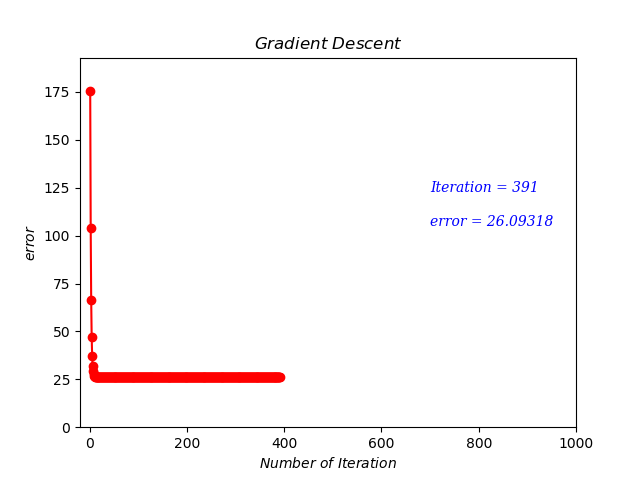

In [14]:
vis = vis_gradient(x = x, y = y, bias = bias, slope = slope, error = err, num_iter = num_iter)
vis.iteration_error()

<IPython.core.display.Javascript object>


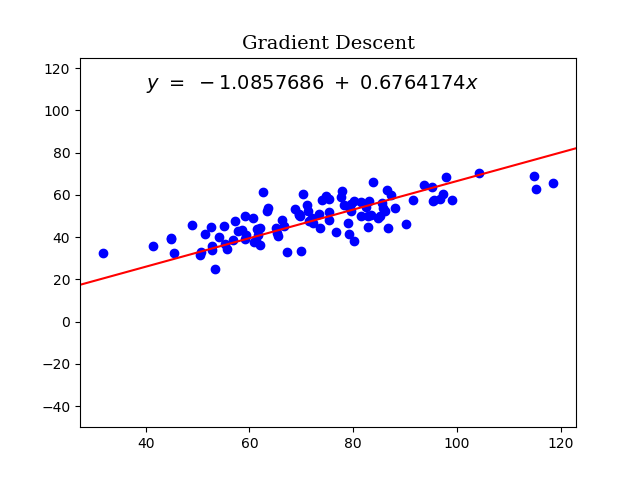

In [15]:
vis.fit_process()

<IPython.core.display.Javascript object>


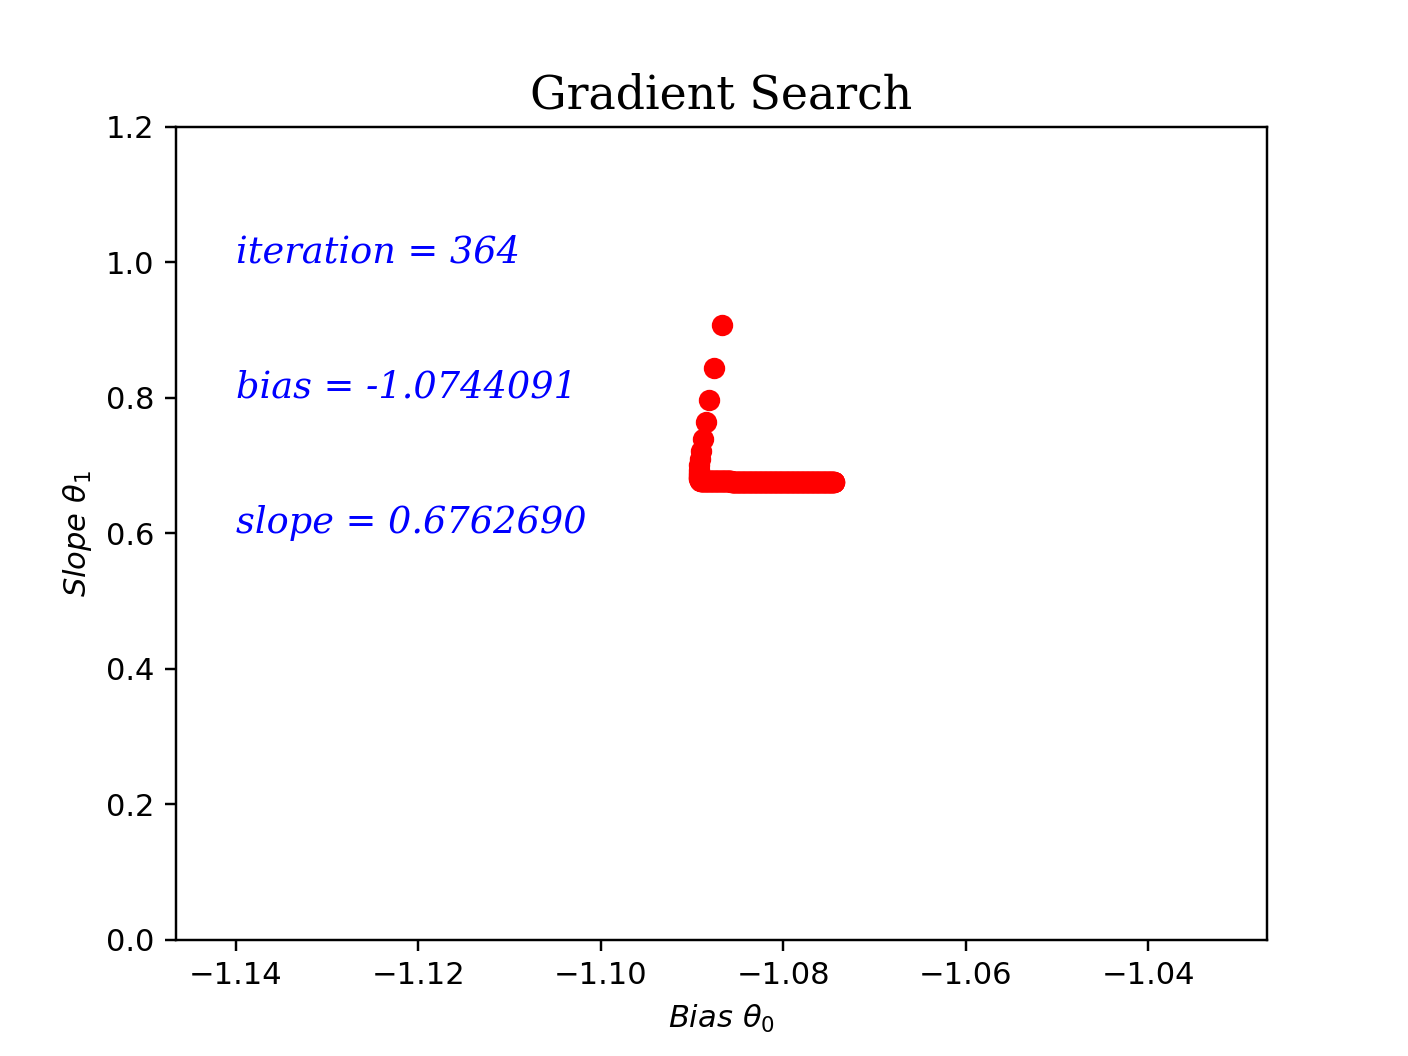

In [16]:
vis.gradient_search()

In [39]:
#Intro to Linear Regression and Gradient Descent

<IPython.core.display.Javascript object>


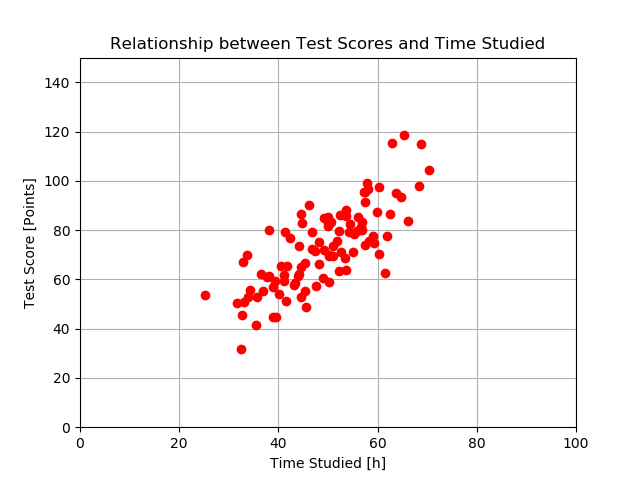

In [17]:
# Load dependencies
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
points = np.genfromtxt("https://raw.githubusercontent.com/hengbinxu/Gradient-Descent-Implementation/master/data.csv", delimiter=",") # a magic function to import .csv files

# Display the data using matplotlib
fig, ax = plt.subplots()  # creates a figure and an axes object
ax.plot(points[:,0], points[:,1], 'ro')
ax.axis([0, 100, 0, 150]) # set the limits of the axis
ax.set(xlabel='Time Studied [h]', ylabel='Test Score [Points]',
       title='Relationship between Test Scores and Time Studied')
ax.grid() # show the grid
plt.show()

In [18]:
def train():
    # Define the Hyperparameters
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    
    # Start the gradient descent algorithm
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
    # return the final result to the global scope
    return [b, m]

In [19]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        if i % 100 == 0:
            # Print the error every 100th iteration
            # The "error" indicates how good our model fits the data.
            print("Iteration {0}: b = {1:.2f}, m = {2:.2f}, error = {3:.5f}".format(i, b, m, compute_error_for_line_given_points(b, m, points)))
    return [b, m]

In [20]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current)) #see formula above
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current)) 
    new_b = b_current - (learningRate * b_gradient) 
    new_m = m_current - (learningRate * m_gradient)
    # Note: Minus the gradient we wanna go down. (neg. gradient => steepest descent)
    return [new_b, new_m]

In [21]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [22]:
[b, m] = train()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
Iteration 0: b = 0.01, m = 0.74, error = 1484.58656
Iteration 100: b = 0.04, m = 1.48, error = 112.64702
Iteration 200: b = 0.04, m = 1.48, error = 112.64342
Iteration 300: b = 0.05, m = 1.48, error = 112.63982
Iteration 400: b = 0.05, m = 1.48, error = 112.63622
Iteration 500: b = 0.06, m = 1.48, error = 112.63263
Iteration 600: b = 0.07, m = 1.48, error = 112.62905
Iteration 700: b = 0.07, m = 1.48, error = 112.62547
Iteration 800: b = 0.08, m = 1.48, error = 112.62190
Iteration 900: b = 0.08, m = 1.48, error = 112.61834
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


<IPython.core.display.Javascript object>


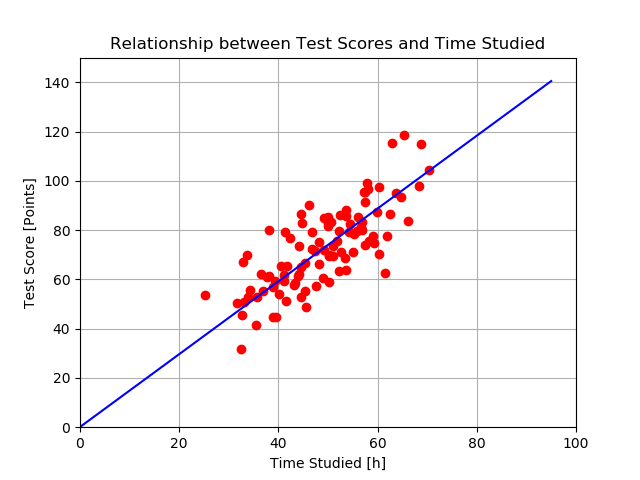

In [23]:
# sample studied hours
h = np.arange(0, 100, 5)

# visualize our model
fig, ax = plt.subplots()  # creates a figure and an axes object
ax.plot(points[:,0], points[:,1], 'ro')
ax.plot(h, m*h + b, 'b')
ax.axis([0, 100, 0, 150])
ax.set(xlabel='Time Studied [h]', ylabel='Test Score [Points]',
       title='Relationship between Test Scores and Time Studied')
ax.grid()
plt.show()

In [66]:
#https://github.com/pangolulu/neural-network-from-scratch

In [67]:
# simple show of weight update

Cost at 10 iteration =  0.04114630674619492
Cost at 20 iteration =  0.026706242729839392
Cost at 30 iteration =  0.024738889446900423
Cost at 40 iteration =  0.023850565034634254
Cost at 50 iteration =  0.0231499048706651
Cost at 60 iteration =  0.02255361434242207
Cost at 70 iteration =  0.0220425055291673
Cost at 80 iteration =  0.021604128492245713
Cost at 90 iteration =  0.021228111750568435
W =  0.47256473531193927 & b =  0.19578262688662174


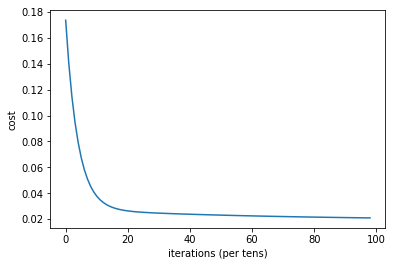

In [24]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

X = [0,0.12,0.25,0.27,0.38,0.42,0.44,0.55,0.92,1.0]
Y = [0,0.15,0.54,0.51, 0.34,0.1,0.19,0.53,1.0,0.58]

costs = []
#Step 1: Parameter initialization 
W = 0.45
b = 0.75

for i in range(1, 100):
    
#Step 2: Step 2: Calculate Cost
    Y_pred = np.multiply(W, X) + b
    Loss_error = 0.5 * (Y_pred - Y)**2
    cost = np.sum(Loss_error)/10
    
#Step 3: Calculate dW and db    
    db = np.sum((Y_pred - Y))
    dw = np.dot((Y_pred - Y), X)
    costs.append(cost)

#Step 4: Update parameters:
    W = W - 0.01*dw
    b = b - 0.01*db
    
    if i%10 == 0:
        print("Cost at", i,"iteration = ", cost)

#Step 5: Repeat from Step, implemented as a for loop with 1000 iterations

#Plot the cost against no. of iterations
print("W = ", W,"& b = ",  b)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.show()

# How to Implement Linear Regression With Stochastic Gradient Descent From Scratch With Python

In [51]:
# y = b0 + b1 * x1 + b2 * x2 + ...

In [52]:
#b = b - learning_rate * error * x

In [25]:
# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat

In [26]:
# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
coef = [0.4, 0.8]
for row in dataset:
	yhat = predict(row, coef)
	print("Expected=%.3f, Predicted=%.3f" % (row[-1], yhat))

Expected=1.000, Predicted=1.200
Expected=3.000, Predicted=2.000
Expected=3.000, Predicted=3.600
Expected=2.000, Predicted=2.800
Expected=5.000, Predicted=4.400


In [55]:
#y = b0 + b1 * x

In [56]:
#y = 0.4 + 0.8 * x

In [57]:
#error = prediction - expected

In [58]:
#b1(t+1) = b1(t) - learning_rate * error(t) * x1(t)

In [59]:
#b0(t+1) = b0(t) - learning_rate * error(t)

In [27]:
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			yhat = predict(row, coef)
			error = yhat - row[-1]
			sum_error += error**2
			coef[0] = coef[0] - l_rate * error
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return coef

In [28]:
# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			yhat = predict(row, coef)
			error = yhat - row[-1]
			sum_error += error**2
			coef[0] = coef[0] - l_rate * error
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return coef

# Calculate coefficients
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
l_rate = 0.001
n_epoch = 50
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

>epoch=0, lrate=0.001, error=46.236
>epoch=1, lrate=0.001, error=41.305
>epoch=2, lrate=0.001, error=36.930
>epoch=3, lrate=0.001, error=33.047
>epoch=4, lrate=0.001, error=29.601
>epoch=5, lrate=0.001, error=26.543
>epoch=6, lrate=0.001, error=23.830
>epoch=7, lrate=0.001, error=21.422
>epoch=8, lrate=0.001, error=19.285
>epoch=9, lrate=0.001, error=17.389
>epoch=10, lrate=0.001, error=15.706
>epoch=11, lrate=0.001, error=14.213
>epoch=12, lrate=0.001, error=12.888
>epoch=13, lrate=0.001, error=11.712
>epoch=14, lrate=0.001, error=10.668
>epoch=15, lrate=0.001, error=9.742
>epoch=16, lrate=0.001, error=8.921
>epoch=17, lrate=0.001, error=8.191
>epoch=18, lrate=0.001, error=7.544
>epoch=19, lrate=0.001, error=6.970
>epoch=20, lrate=0.001, error=6.461
>epoch=21, lrate=0.001, error=6.009
>epoch=22, lrate=0.001, error=5.607
>epoch=23, lrate=0.001, error=5.251
>epoch=24, lrate=0.001, error=4.935
>epoch=25, lrate=0.001, error=4.655
>epoch=26, lrate=0.001, error=4.406
>epoch=27, lrate=0.001,

In [66]:
# SGD